In [1]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#Carga de dataset
df = pd.read_csv('amazon_raw.csv')
df_transform = df.copy()

In [3]:
#Ver las primeras diez filas del dataset
print(df_transform.head(10))

         Order ID Order Date   Ship Date                   EmailID  \
0  CA-2013-138688  6/13/2013   6/17/2013   DarrinVanHuff@gmail.com   
1  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
2  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
3  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
4  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
5  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
6  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
7  CA-2011-115812   6/9/2011   6/14/2011  BrosinaHoffman@gmail.com   
8  CA-2013-161389  12/6/2013  12/11/2013     IreneMaddox@gmail.com   
9  CA-2011-167164  5/13/2011   5/15/2011  AlejandroGrove@gmail.com   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  Un

In [4]:
#Verificar si hay duplicados
df_transform.duplicated().sum()

np.int64(0)

In [5]:
#Ver el detalle de cada columna
print(df_transform.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   EmailID       3203 non-null   object 
 4   Geography     3203 non-null   object 
 5   Category      3203 non-null   object 
 6   Product Name  3203 non-null   object 
 7   Sales         3203 non-null   float64
 8   Quantity      3203 non-null   float64
 9   Profit        3203 non-null   float64
dtypes: float64(3), object(7)
memory usage: 250.4+ KB
None


In [6]:
#Ver cantidad de columnas y filas
df_transform.shape

(3203, 10)

In [7]:
# Cantidad de categorías únicas
unique_categories = df_transform['Category'].nunique()
print(f'Cantidad de categorías únicas: {unique_categories}')

# Cantidad de productos únicos
unique_products = df_transform['Product Name'].nunique()
print(f'Cantidad de productos únicos: {unique_products}')

Cantidad de categorías únicas: 17
Cantidad de productos únicos: 1494


In [8]:
# Lista de categorías únicas
print('Categorías únicas:')
print(df_transform['Category'].unique())

Categorías únicas:
['Labels' 'Furnishings' 'Art' 'Phones' 'Binders' 'Appliances' 'Tables'
 'Storage' 'Accessories' 'Paper' 'Chairs' 'Fasteners' 'Supplies'
 'Envelopes' 'Copiers' 'Bookcases' 'Machines']


#Transformación y creación de columnas

In [9]:
#Convertir columndas Orde date y Ship Date en datetime
df_transform['Order Date'] = pd.to_datetime(df['Order Date'])
df_transform['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
#Crear columna Shippin delay para saber cuanto se tarda el envio
df_transform['Shipping Delay'] = (df_transform['Ship Date'] - df_transform['Order Date']).dt.days

In [11]:
#Ver estadisticas descriptivas para mi nueva columna
df_transform['Shipping Delay'].describe()

count    3203.000000
mean        3.930066
std         1.806914
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Delay, dtype: float64

<Axes: xlabel='Shipping Delay', ylabel='Count'>

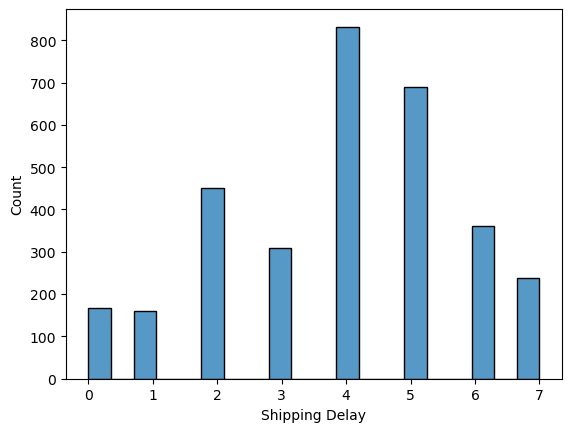

In [12]:
sns.histplot(df_transform['Shipping Delay'], bins=20)

In [13]:
#Crear columndas de año, mes y ańo y mes
df_transform['Year'] = df_transform['Order Date'].dt.year
df_transform['Month'] = df_transform['Order Date'].dt.month
df_transform['YearMonth'] = df_transform['Order Date'].dt.to_period('M')
df_transform['Order_Quarter'] = df_transform['Order Date'].dt.to_period('Q')

In [14]:
#Crear columndas Country, City y State a partir de Geography
df_transform[['Country', 'City', 'State']] = df_transform['Geography'].str.split(',', expand=True)

In [46]:
df_transform[df_transform['Sales'] == 0]

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,...,Order_Quarter,Country,City,State,Profit Margin,Loss Flag,Sales_Level,Profit_Level,Quantity_Level,Shipping_Speed


In [47]:
#Crear columna Profir MArgin
df_transform['Profit Margin'] = df_transform['Profit'] / df_transform['Sales']

In [49]:
df_transform[df_transform['Profit'] < 0].sort_values(by='Profit')

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,...,Country,City,State,Profit Margin,Loss Flag,Sales_Level,Profit_Level,Quantity_Level,Shipping_Speed,Negative Profit
969,CA-2014-134845,2014-04-18,2014-04-24,SharelleRoach@gmail.com,"United States,Louisville,Colorado",Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.99,5.0,-3399.98,...,United States,Louisville,Colorado,-1.333331,True,Alta,Pérdida,Moderada,Lento,True
2487,US-2013-157490,2013-10-07,2013-10-08,LaurelBeltran@gmail.com,"United States,Pueblo,Colorado",Machines,Zebra GK420t Direct Thermal/Thermal Transfer P...,703.71,6.0,-938.28,...,United States,Pueblo,Colorado,-1.333333,True,Alta,Pérdida,Alta,Muy Rápido,True
134,CA-2013-109869,2013-04-23,2013-04-30,TanjaNorvell@gmail.com,"United States,Phoenix,Arizona",Tables,Bush Advantage Collection Racetrack Conference...,1272.63,6.0,-814.48,...,United States,Phoenix,Arizona,-0.639997,True,Alta,Pérdida,Alta,Muy Lento,True
413,US-2012-103471,2012-12-24,2012-12-28,JimRadford@gmail.com,"United States,Colorado Springs,Colorado",Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.06,7.0,-786.74,...,United States,Colorado Springs,Colorado,-1.333322,True,Alta,Pérdida,Alta,Normal,True
2960,CA-2011-148383,2011-12-27,2011-12-31,ResiPÃ¶lking@gmail.com,"United States,Phoenix,Arizona",Binders,GBC DocuBind 300 Electric Binding Machine,946.76,6.0,-694.29,...,United States,Phoenix,Arizona,-0.733333,True,Alta,Pérdida,Alta,Normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,US-2014-100209,2014-07-10,2014-07-16,TamaraDahlen@gmail.com,"United States,Portland,Oregon",Binders,Wilson Jones Easy Flow II Sheet Lifters,1.08,2.0,-0.79,...,United States,Portland,Oregon,-0.731481,True,Baja,Pérdida,Poca,Lento,True
1576,CA-2012-106978,2012-09-28,2012-10-04,ZuschussCarroll@gmail.com,"United States,Aurora,Colorado",Binders,Wilson Jones Easy Flow II Sheet Lifters,1.08,2.0,-0.79,...,United States,Aurora,Colorado,-0.731481,True,Baja,Pérdida,Poca,Lento,True
1638,CA-2014-156720,2014-12-31,2015-01-04,JillMatthias@gmail.com,"United States,Loveland,Colorado",Fasteners,Bagged Rubber Bands,3.02,3.0,-0.60,...,United States,Loveland,Colorado,-0.198675,True,Baja,Pérdida,Moderada,Normal,True
2406,CA-2014-121125,2014-05-31,2014-06-04,MichaelGranlund@gmail.com,"United States,Tigard,Oregon",Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,13.59,1.0,-0.34,...,United States,Tigard,Oregon,-0.025018,True,Baja,Pérdida,Poca,Normal,True


In [50]:
df_transform['Transaction Type'] = df_transform['Profit'].apply(
    lambda x: 'Return' if x < 0 else 'Sale'
)

In [51]:
df_transform['Is Return'] = df_transform['Profit'] < 0

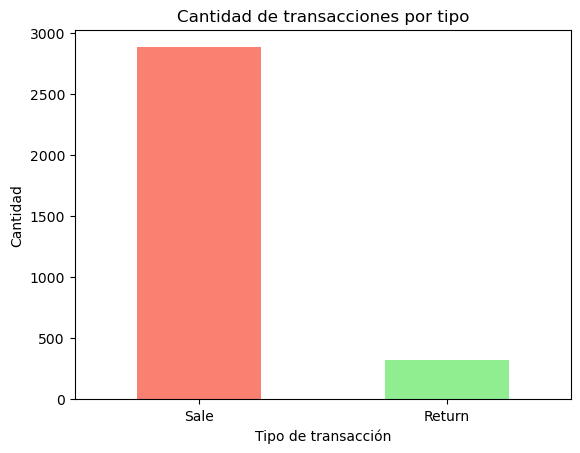

In [52]:
df_transform['Transaction Type'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Cantidad de transacciones por tipo')
plt.xlabel('Tipo de transacción')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

In [53]:
return_ratio = df_transform['Is Return'].mean()
print(f'📉 Porcentaje de devoluciones: {return_ratio:.2%}')

📉 Porcentaje de devoluciones: 9.93%


In [54]:
df_transform.groupby('Transaction Type')['Profit'].mean()

Transaction Type
Return   -71.450094
Sale      45.455778
Name: Profit, dtype: float64

En este dataset, las transacciones con Profit negativo corresponden consistentemente a devoluciones. Por lo tanto, se define una transacción como devolución si Profit < 0, lo cual es coherente tanto con los datos como con la lógica comercial.

In [35]:
# Variables numéricas
num_cols = ['Sales', 'Profit', 'Quantity']
df_transform[num_cols].describe()

,Sales,Profit,Quantity
count,3203.000000,3203.000000,3203.000000
mean,226.493266,33.849138,3.828910
std,524.876911,174.109155,2.260947
min,0.990000,-3399.980000,1.000000
25%,19.440000,3.850000,2.000000
50%,60.840000,11.170000,3.000000
75%,215.810000,33.000000,5.000000
max,13999.960000,6719.980000,14.000000


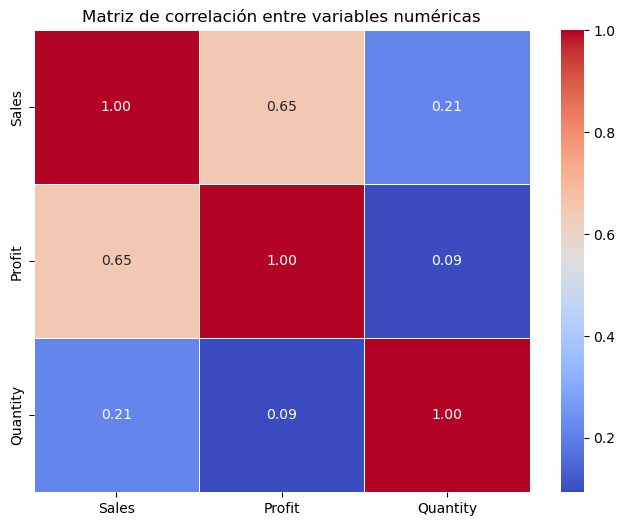

In [36]:
# Calcular la matriz de correlación
corr = df_transform[num_cols].corr()

# Visualizar como mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [37]:
# Calcular y mostrar los percentiles para cada columna
for col in num_cols:
    print(f'\nPercentiles de {col}:')
    print(f"  0% (mínimo): {df[col].quantile(0):.2f}")
    print(f" 25% (Q1)   : {df[col].quantile(0.25):.2f}")
    print(f" 50% (mediana): {df[col].quantile(0.50):.2f}")
    print(f" 75% (Q3)   : {df[col].quantile(0.75):.2f}")
    print(f"100% (máximo): {df[col].quantile(1):.2f}")


Percentiles de Sales:
  0% (mínimo): 0.99
 25% (Q1)   : 19.44
 50% (mediana): 60.84
 75% (Q3)   : 215.81
100% (máximo): 13999.96

Percentiles de Profit:
  0% (mínimo): -3399.98
 25% (Q1)   : 3.85
 50% (mediana): 11.17
 75% (Q3)   : 33.00
100% (máximo): 6719.98

Percentiles de Quantity:
  0% (mínimo): 1.00
 25% (Q1)   : 2.00
 50% (mediana): 3.00
 75% (Q3)   : 5.00
100% (máximo): 14.00


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Profit'}>],
       [<Axes: title={'center': 'Quantity'}>, <Axes: >]], dtype=object)

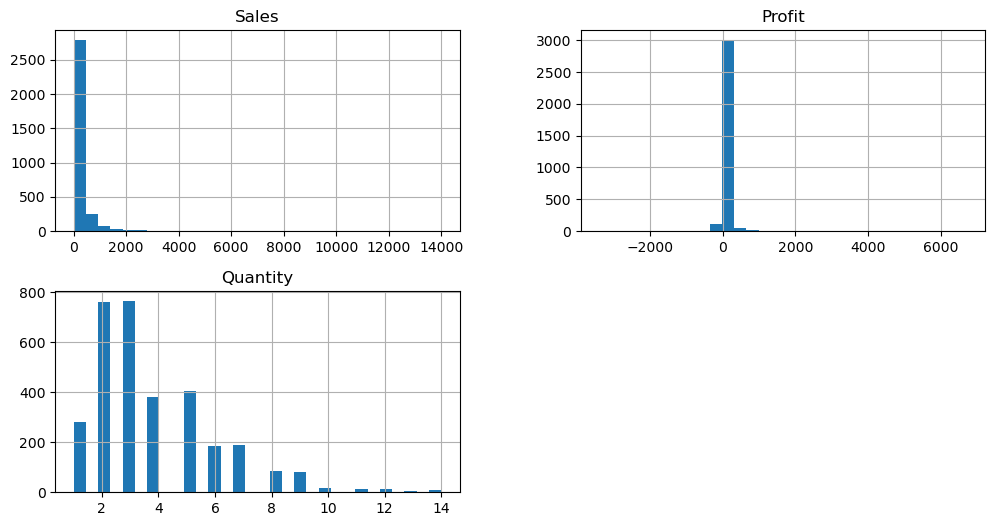

In [38]:
# Distribución de las variables
df_transform[num_cols].hist(bins=30, figsize=(12, 6))

<Axes: >

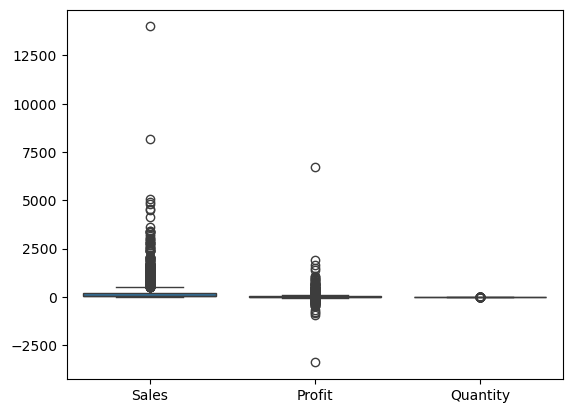

In [39]:
# Boxplot para detectar outliers
import seaborn as sns
sns.boxplot(data=df_transform[num_cols])

In [55]:
df_transform['Unit Value'] = abs(df_transform['Sales'] / df_transform['Quantity'])

In [56]:
# Filtrar filas con Unit Value <= 0
unit_price_invalid = df_transform[df_transform['Unit Value'] <= 0]

# Mostrar esas filas
print(unit_price_invalid)

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, EmailID, Geography, Category, Product Name, Sales, Quantity, Profit, Shipping Delay, Year, Month, YearMonth, Order_Quarter, Country, City, State, Profit Margin, Loss Flag, Sales_Level, Profit_Level, Quantity_Level, Shipping_Speed, Negative Profit, Transaction Type, Is Return, Unit Value]
Index: []

[0 rows x 28 columns]


In [41]:
df_transform.groupby('Category')[num_cols].sum().sort_values(by='Sales', ascending=False)

,Sales,Profit,Quantity
Category,,,
Chairs,101781.36,4027.62,734.0
Phones,98684.39,9111.06,1066.0
Tables,84754.60,1482.54,481.0
Storage,70532.84,8645.49,1039.0
Accessories,61114.10,16484.62,1032.0
Binders,55961.11,16096.78,1868.0
Copiers,49749.23,19327.25,88.0
Machines,42444.14,-618.95,147.0
Bookcases,36004.18,-1646.50,306.0


In [42]:
df_transform.groupby('Product Name')[num_cols].sum().sort_values(by='Sales', ascending=False).head(10)

,Sales,Profit,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,13999.96,6719.98,4.0
High Speed Automatic Electric Letter Opener,13100.24,524.01,8.0
Global Troy Executive Leather Low-Back Tilter,10019.61,626.24,25.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,8134.33,3050.38,8.0
GuestStacker Chair with Chrome Finish Legs,8030.01,802.99,27.0
Okidata MB760 Printer,7834.40,881.37,7.0
Bretford Rectangular Conference Table Tops,7710.66,180.53,26.0
LogitechÂ P710e Mobile Speakerphone,7467.21,1418.78,29.0
Canon PC1060 Personal Laser Copier,6719.90,2267.97,12.0


In [43]:
df_transform.groupby('City')[num_cols].sum().sort_values(by='Sales', ascending=False).head(10)

,Sales,Profit,Quantity
City,,,
Los Angeles,175851.33,30440.94,2877.0
Seattle,119540.74,29156.13,1590.0
San Francisco,112669.09,17507.39,1935.0
San Diego,47521.05,6377.24,670.0
Denver,12198.78,-244.91,164.0
Phoenix,11000.27,-2790.85,224.0
North Las Vegas,9801.00,2247.68,58.0
Anaheim,7986.88,1233.98,112.0
Fresno,7888.53,948.26,106.0


In [44]:
df_transform.groupby('EmailID')[num_cols].sum().sort_values(by='Sales', ascending=False).head(10)

,Sales,Profit,Quantity
EmailID,,,
RaymondBuch@gmail.com,14345.28,6807.08,23.0
KenLonsdale@gmail.com,8472.39,426.61,32.0
EdwardHooks@gmail.com,7447.77,589.74,51.0
JaneWaco@gmail.com,7391.53,2073.29,35.0
KarenFerguson@gmail.com,7182.76,878.42,34.0
NickCrebassa@gmail.com,6734.23,706.58,38.0
ClayLudtke@gmail.com,6069.65,890.33,63.0
YanaSorensen@gmail.com,5754.17,1551.61,38.0
NoraPreis@gmail.com,5564.60,367.72,42.0


<Axes: xlabel='YearMonth'>

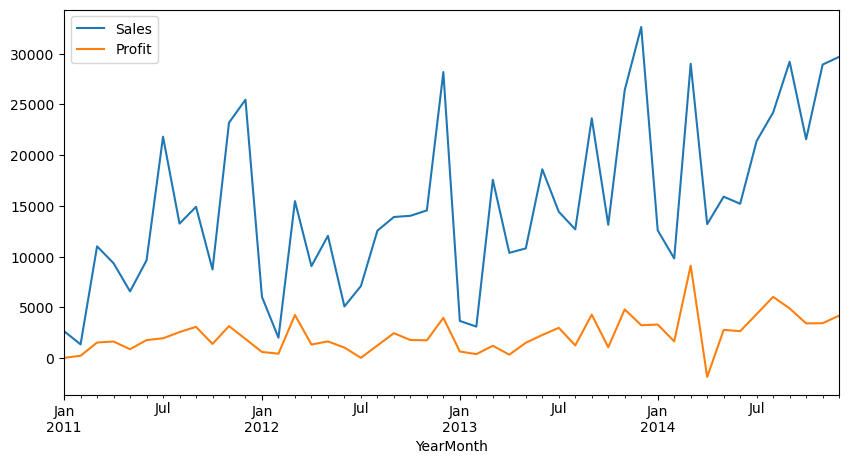

In [26]:
df_transform.groupby('YearMonth')[['Sales', 'Profit']].sum().plot(kind='line', figsize=(10,5))

In [28]:
def classify_sales(x):
    if x < 19.44:
        return 'Baja'
    elif x < 60.84:
        return 'Media-baja'
    elif x < 215.81:
        return 'Media-alta'
    else:
        return 'Alta'

df_transform['Sales_Level'] = df_transform['Sales'].apply(classify_sales)

In [29]:
def classify_profit(x):
    if x < 0:
        return 'Pérdida'
    elif x < 11.17:
        return 'Ganancia baja'
    elif x < 33.00:
        return 'Ganancia media'
    else:
        return 'Ganancia alta'

df_transform['Profit_Level'] = df_transform['Profit'].apply(classify_profit)

In [30]:
def classify_quantity(x):
    if x <= 2:
        return 'Poca'
    elif x <= 5:
        return 'Moderada'
    else:
        return 'Alta'

df_transform['Quantity_Level'] = df_transform['Quantity'].apply(classify_quantity)

In [31]:
def clasificar_shipping(dias):
    if dias <= 2:
        return 'Muy Rápido'
    elif dias <= 4:
        return 'Normal'
    elif dias <= 6:
        return 'Lento'
    else:
        return 'Muy Lento'

df_transform['Shipping_Speed'] = df_transform['Shipping Delay'].apply(clasificar_shipping)

In [57]:
#Ver cantidad de columnas y filas
df_transform.shape

(3203, 28)

In [ ]:
df_transform.to_csv('mi_dataset_transformado.csv', index=False)

Exploración de palabras más usadas en columna Product Name